# COGS 118A- Project Checkpoint

# Names

Hopefully your team is at least this good. Obviously you should replace these with your names.

- Zhaoge Ouyang
- Bateliel Bassa
- Jason Hsu
- Kevin Thai
- Katelyn Dang

# Abstract 
Heart disease is one of the leading medical issues in the U.S. that has affected “as of 2018, 30.3 million U.S. adults”<a name="https://www.healthline.com/health/heart-disease/statistics"></a>[<sup>[1]</sup>](https://www.healthline.com/health/heart-disease/statistics) as reported by the CDC (Centers for Disease Control and Prevention). Our team would like to find out patterns that may lead to high risk of heart disease and possibly predict if a patient is at a high risk. We will be using 2020 annual CDC survey data of 320k adults related to their health status, provided on Kaggle. The data includes various variables regarding a patient's lifestyle and physical health, such as a person's BMI or whether they have smoked a certain number of cigarettes in their life, measured as a yes/no question. We will be training models to detect “patterns”, such that we can predict a patient’s heart condition and whether or not a patient is more likely to have heart diseases. We will split the dataset to 80% training, 10% validation, and 10% test set. With around 320,000 valid observations, the training set will have about 256,000 observations, while the validation and test set will have 64,000 observations each. The performance will be measured with accuracy.

# Background

Heart disease is one of the leading causes of death around the world. According to CDC, 659,000 people die from heart diseases in the United States. There are many factors that contribute to heart disease, including lifestyle and genetics. Health conditions such as high blood pressure, unhealthy blood cholesterol level, diabetes, and obesity increase the risk of heart dieseases. In addition, behaviors such as a diet high in saturated fat, trans fat, lack of physical exercise, alcohol abuse, tobacco use also increases a patient’s risk of heart diseases. Other than life styles, genetics and race also affect the risk of heart diseases. Genetic factors affect the risk of health conditions that are related to heart diseases, and some races are more likely to to be at risk of heart diseases than others. Lastly, heart diseases tend to happen more often as age goes up<a name="admonish"></a>[<sup>[2]</sup>](#admonishnote).

# Problem Statement

Currently, there aren’t many tools that are able to predict the likelihood of whether a patient is at risk of heart diseases based on their lifestyle and genetics. Therefore, we want to train a model that can properly make predictions on whether a patient may have heart disease.
 Whether the patient is at potential risk of heart disease will be measured as a simple 0 or 1 output, 0 for if the patient is less likely to be at risk and 1 for if the patient is at possible risk. By reviewing the prediction outcomes, we will also be able to determine which parameters contribute the most heavily to potential risk of heart diseases. Given appropriate data that matches the variables/parameters our model is trained on, the model should be able to produce a prediction of a patient’s risk for heart disease. 

# Data

We will be using 2020 annual CDC survey data of 320k adults related to their health status, obtained on Kaggle<a name="https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease"></a>[<sup>[3]</sup>](https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease). The dataset includes 18 variables and ~320,000 observations. Variables includes health related status such as had heart disease, smoked 100 cigarettes in their lifetime, having at least 7 (female) /14 (male) drinks a week depending, had a stroke, considered their physical or mental health to be “unwell” over the past 30 days, difficulty walking up stairs, gender, age, and BMI.

The dataset includes various kinds of data types.Gender questions were answered as Male/Female, race was measured by the participants ethnicity, General health was measured on a likert scale, age category was answered as a range from 18-24 to 80-over, BMI and sleeping time was measured as a specific number, physical and mental health from a range from 0-30, and all other variables were answered as Yes/No.

To better handle the data, we will need to transform binary data types and categorical data into one-hot encoding (i.e. The Gender column would be split into Male and Female columns). In addition, there are only about 9% of data that are labeled as having heart disease or myocardial infarction. To combat the unbalanced proportion of data is to undersample our data (reduce the number of data that contains negative cases). Note that if we proceed with undersampling data, we will lose a lot of information. However, since the dataset is quite huge, we should still have a sufficient amount of data to work with. Another possible problem we may encounter is that many features seem to also be unbalanced (i.e. proportion of people who have kidney disease is much lower than people who don’t). Therefore, we may also need to balance weights by giving the smaller class more weights.


In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('heart_2020_cleaned.csv')

df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [3]:
df.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

## Data Cleaning

### Encode Age

In [4]:
def encode_age(age):
    if age == '18-24':
        return 18
    elif age == '25-29':
        return 25
    elif age == '30-34':
        return 30
    elif age == '35-39':
        return 35
    elif age == '40-44':
        return 40
    elif age == '45-49':
        return 45
    elif age == '50-54':
        return 50
    elif age == '55-59':
        return 55
    elif age == '60-64':
        return 60
    elif age == '65-69':
        return 65
    elif age == '70-74':
        return 70
    elif age == '75-79':
        return 75
    return 80

df.rename(columns={'AgeCategory':'Age'}, inplace=True)
df['Age'] = df['Age'].apply(encode_age)

## EDA

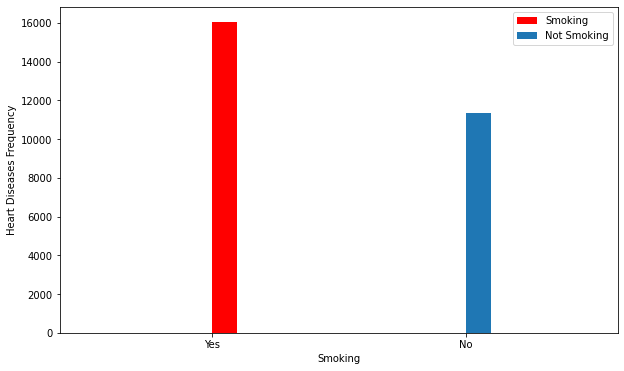

In [61]:
fig, ax = plt.subplots(figsize = (10,6))

smoking_heart_diseases = df[(df['HeartDisease']=='Yes') & (df['Smoking']=='Yes')]['Smoking']
not_smoking_heart_diseases = df[(df['HeartDisease']=='Yes') & (df['Smoking']=='No')]['Smoking']

ax.hist(smoking_heart_diseases, color='r', label='Smoking')
ax.hist(not_smoking_heart_diseases, label='Not Smoking')
ax.set_xlabel("Smoking")
ax.set_ylabel("Heart Diseases Frequency")
plt.legend()

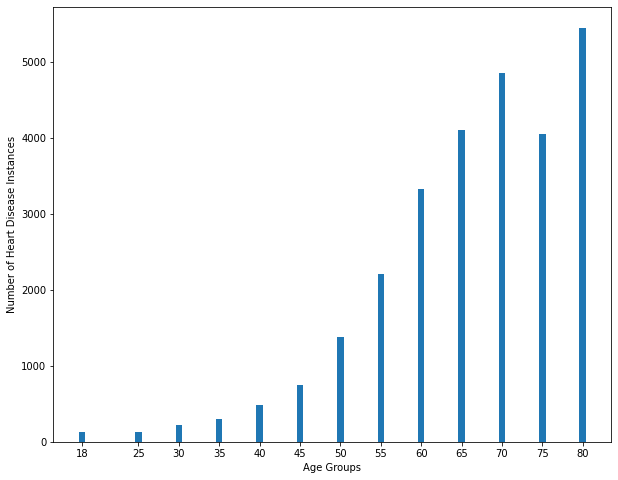

In [42]:
# visualize the trend of heart disease vs age
arr = np.array(df[df["HeartDisease"]=='Yes']["Age"])
unique, counts = np.unique(arr, return_counts=True)
x_label = ['18', '25', '30', '35', '40', '45', '50', '55', '60', '65', '70', '75', '80']

plt.figure(figsize=(10, 8))
plt.bar(unique, counts)
plt.xticks(unique, x_label)
plt.xlabel("Age Groups")
plt.ylabel("Number of Heart Disease Instances")
plt.show()

# Proposed Solution

We will be developing a logistic regression and K-NN model, given parameters, such as smoking, alcohol drinking, and etc., to predict whether a patient is likely to have heart diseases or not. The goal of having both models is to find the best model that can make heart disease predictions. With logistic regression, we can also make inference on which variable influences the decision.

By discovering similar characteristics for patients who have heart disease, along with a substantial number of observations, we hope to apply some of these characteristics as a more general prediction for patients who could have heart disease in the future as a preventative measure. We would test this solution using k-folds cross validation between our selected models in order to better generalize our algorithm. We would be able to use this form of cross validation due to the large number of observations that are in our dataset.

# Evaluation Metrics

10% out of 320,000 observations in the total dataset will be used toward the test set. We will test our algorithms with the test set and compare the percentage of correct predictions out of all test cases. Since the result will be in binary (have heart disease or does not have heart disease), we can simply look at the rate the dataset outputs a correct result. The accuracy equation is as follows:
 
Accuracy = (TP + TN) / (TP + TN + FP + FN)
Denote: True Positive = TP, True Negative = TN, False Positive = FP, False Negative = FN

# Preliminary results

NEW SECTION!

Please show any preliminary results you have managed to obtain.

Examples would include:
- Analyzing the suitability of a dataset or alogrithm for prediction/solving your problem 
- Performing feature selection or hand-designing features from the raw data. Describe the features available/created and/or show the code for selection/creation
- Showing the performance of a base model/hyper-parameter setting.  Solve the task with one "default" algorithm and characterize the performance level of that base model.
- Learning curves or validation curves for a particular model
- Tables/graphs showing the performance of different models/hyper-parameters



# Ethics & Privacy

Our datasets will come from public datasets. Since our dataset comes from a survey that was collected by the CDC, the methods of data collection shouldn't be a violation of privacy as long as their name and personal information is not included. Additionally, in terms of data storage, we do not hold any personal information of the participants of the survey and it is a public dataset, so fears of data leakage or data deletion should not pose a problem. Additionally, this survey was taken by over 320,000 adults across all 50 states, so there is a very big sample to help decrease any bias and increase generalizability to adults in the U.S. Since, only about 10% of our data includes positive cases, this could lead to a potential bias towards a certain group or population in our data. To help ensure we don’t encounter any ethics or privacy problems in our project, we can use deon to check our project. 

# Team Expectations 

- Put things here that cement how you will interact/communicate as a team, how 
- Communicate through Discord
- Collaborate on coding through google collab
- Collaborate on reports through google doc 
- Weekly Team Meetings to evaluate progress and go over any issues/roadblocks
- Issues/roadblocks will be handled as a group if needed or giving guidance where confusion may have been caused
- Meeting scheduled goals/progression according to the timeline
- Roadblocks that may affect the timeline will be discussed and the timeline will be adjusted accordingly

# Project Timeline Proposal

UPDATE THE PROPOSAL TIMELINE ACCORDING TO WHAT HAS ACTUALLY HAPPENED AND HOW IT HAS EFFECTED YOUR FUTURE PLANS

| Meeting Date  | Meeting Time| Completed Before Meeting  | Discuss at Meeting |
|---|---|---|---|
| 1/20  |  1 PM |  Brainstorm topics/questions (all)  | Determine best form of communication; Discuss and decide on final project topic; discuss hypothesis; begin background research | 
| 1/26  |  10 AM |  Do background research on topic (Pelé) | Discuss ideal dataset(s) and ethics; draft project proposal | 
| 2/1  | 10 AM  | Edit, finalize, and submit proposal; Search for datasets (Beckenbaur)  | Discuss Wrangling and possible analytical approaches; Assign group members to lead each specific part   |
| 2/14  | 6 PM  | Import & Wrangle Data ,do some EDA (Maradonna) | Review/Edit wrangling/EDA; Discuss Analysis Plan   |
| 2/23  | 12 PM  | Finalize wrangling/EDA; Begin programming for project (Cruyff) | Discuss/edit project code; Complete project |
| 3/13  | 12 PM  | Complete analysis; Draft results/conclusion/discussion (Carlos)| Discuss/edit full project |
| 3/19  | Before 11:59 PM  | NA | Turn in Final Project  |

# Footnotes
<a name="healthlinenote"></a>1.[^](#healthline):  Thomas, J. (16 July 2020) Heart Disease: Facts, Statistics, and You. Healthline Media. https://www.healthline.com/health/heart-disease/statistics <br>
<a name="admonishnote"></a>2.[^](#admonish): Heart Disease Facts CDC. https://www.cdc.gov/heartdisease/facts.htm#:~:text=Heart%20Disease%20in%20the%20United%20States&text=One%20person%20dies%20every%2036,United%20States%20from%20cardiovascular%20disease.&text=About%20659%2C000%20people%20in%20the,1%20in%20every%204%20deaths. <br>
Know Your Risk for Heart Disease. CDC. https://www.cdc.gov/heartdisease/risk_factors.htm<br>
<a name="sotanote"></a>3.[^](#sota): Data source: https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease
